In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

There is no any missing values in the dataset.

Text(0.5, 1.0, 'Box plot of SL')

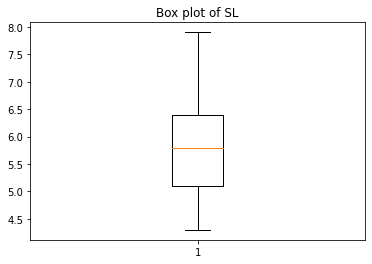

In [8]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

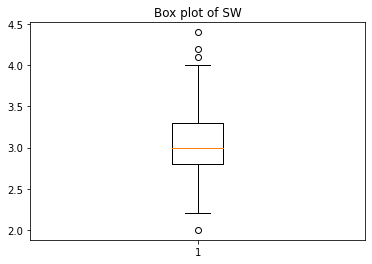

In [9]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

There is a few ouliers in SW, Let's check them.

In [10]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [11]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [12]:
IQR=Q3-Q1

In [13]:
low_lim_sw=Q1-1.5*IQR
up_lim_sw=Q3+1.5*IQR

In [14]:
print(low_lim_sw)
print(up_lim_sw)

2.05
4.05


In [15]:
outlier=[]
for y in data['SW']:
    if((y<low_lim_sw) or (y>up_lim_sw)):
        outlier.append(y)

In [16]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [17]:
ind1=data['SW']>up_lim_sw
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [18]:
data.drop([15, 32, 33],inplace=True)

In [19]:
ind2=data['SW']<low_lim_sw
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [20]:
data.drop([60],inplace=True)

In [21]:
data.shape

(146, 5)

All outliers in SW are removed

Text(0.5, 1.0, 'Box plot of SW')

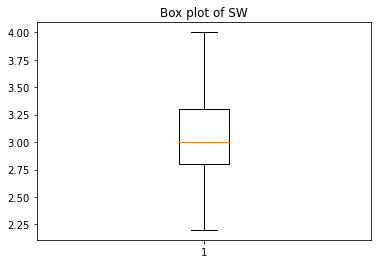

In [22]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

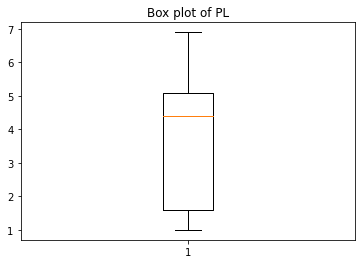

In [23]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

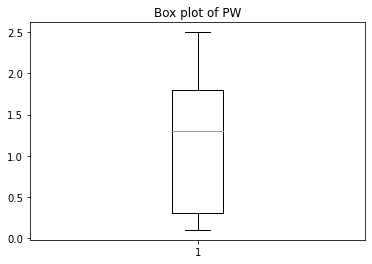

In [24]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [25]:
data.Classification.nunique()

3

In [26]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Classification, dtype: int64

In [27]:
data['Classification'].value_counts(normalize=True)

Iris-virginica     0.342466
Iris-versicolor    0.335616
Iris-setosa        0.321918
Name: Classification, dtype: float64

In [28]:
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])

In [29]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

## i)Logisitic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=10.0,random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [33]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score
log_ac=accuracy_score(y_test,y_pred)
log_f1=f1_score(y_test,y_pred,average='weighted')

In [34]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.9459459459459459
Precision score is: 0.9531531531531531
Recall score is: 0.9459459459459459
f1 score is: 0.944015444015444


In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[16  0  0]
 [ 0  6  2]
 [ 0  0 13]]


## ii)KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

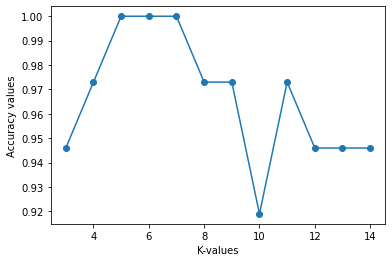

In [38]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K-values')
plt.ylabel('Accuracy values')
plt.show()

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [40]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

## iii)Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459


In [42]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

## iv)Support Vector Machine(SVM)

### SVM Linear Kernel

In [43]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [44]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.972972972972973
Precision is:  0.972972972972973
Recall is:  0.972972972972973
F1 score is:  0.972972972972973


In [45]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

### SVM Polynomial Kernel

In [46]:
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly')
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

Accuracy is:  0.972972972972973
Precision is:  0.9749034749034748
Recall is:  0.972972972972973
F1 score is:  0.9725725725725727


In [47]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

### SVM Radial Basis Function

In [48]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

Accuracy is:  0.9459459459459459
Precision is:  0.9567567567567568
Recall is:  0.9459459459459459
F1 score is:  0.9466966966966968


In [49]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 11]], dtype=int64)

## v)Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'weighted'))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459


In [52]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

Comparing all these classification models, we can clearly understand that the KNN model is the best model for classification of Iris Species using this dataset. It gives us 100% Accuracy,Precision,Recall and F1 Score.